In [2]:
# Import the necessary libraries.
from langchain_community.document_loaders import WikipediaLoader
from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain_openai import AzureChatOpenAI
from langchain_core.documents import Document
import networkx as nx
from langchain.chains import GraphQAChain
from langchain_community.graphs.networkx_graph import NetworkxEntityGraph
import matplotlib.pyplot as plt

In [6]:
# Define the variables to connect to the Azure OpenAI Service API.
AZURE_OPENAI_KEY = "PLEASE_ENTER_YOUR_OWNED_AZURE_OPENAI_KEY"
AZURE_OPENAI_ENDPOINT = "https://PLEASE_ENTER_YOUR_OWNED_AZURE_OPENAI_RESOURCE_NAME.openai.azure.com/"
AZURE_OPENAI_API_VERSION = "2024-02-01"
AZURE_OPENAI_CHAT_DEPLOYMENT_NAME = "PLEASE_ENTER_YOUR_OWNED_AZURE_OPENAI_LLM_MODEL_DEPLOYMENT_NAME"

In [3]:
# Loading the Wikipedia data.
wiki_search = "Despicable Me"
wiki_search_raw_result = WikipediaLoader(query=wiki_search).load()

In [4]:
# Display the raw result from the Wikipedia search.
wiki_search_raw_result

[Document(page_content="Despicable Me is an American media franchise created by Sergio Pablos, Cinco Paul and Ken Daurio. It centers on a former supervillain turned secret agent named Gru, his adoptive daughters, Margo, Edith, and Agnes, and his yellow-colored Minions. The franchise is produced by Illumination and distributed by its parent company Universal Pictures.\nThe franchise began with the 2010 film of the same name, which was followed by three sequels, Despicable Me 2 (2013), Despicable Me 3 (2017), and Despicable Me 4 (2024) and by two spin-off prequels, Minions (2015) and Minions: The Rise of Gru (2022). The franchise also includes many short films, a television special, several video games, and a theme park attraction. It is the highest-grossing animated film franchise, the 15th highest-grossing film franchise of all time and also one of the highest-grossing media franchises of all time.\n\n\n== Feature films ==\n\n\n=== Main series ===\n\n\n==== Despicable Me (2010) ====\n\

In [5]:
# Extract the text from the raw result.
raw_result_text = [d.page_content for d in wiki_search_raw_result]

In [6]:
# Transform the raw result text into a string.
raw_result_text_string = " ".join(raw_result_text)

In [7]:
# Count the number of characters in the raw result text string.
len(raw_result_text_string)

85162

In [7]:
# Define the model function to use the Azure OpenAI Service API.
model = AzureChatOpenAI(
    openai_api_version=AZURE_OPENAI_API_VERSION,
    azure_endpoint=AZURE_OPENAI_ENDPOINT,
    azure_deployment=AZURE_OPENAI_CHAT_DEPLOYMENT_NAME,
    api_key=AZURE_OPENAI_KEY
)

# Define the graph transformer to use the LLM model.
llm_transformer = LLMGraphTransformer(llm=model)

In [16]:
# Convert the raw result text string into a graph document.
documents = [Document(page_content=raw_result_text_string)]
graph_documents = llm_transformer.convert_to_graph_documents(documents)

In [17]:
# Define the variables to access the graph documents.
graph_documents_nodes = graph_documents[0].nodes
graph_documents_relationships = graph_documents[0].relationships

In [18]:
# Display the graph documents nodes.
graph_documents_nodes

[Node(id='Despicable Me', type='Media franchise'),
 Node(id='Sergio Pablos', type='Person'),
 Node(id='Cinco Paul', type='Person'),
 Node(id='Ken Daurio', type='Person'),
 Node(id='Gru', type='Character'),
 Node(id='Margo', type='Character'),
 Node(id='Edith', type='Character'),
 Node(id='Agnes', type='Character'),
 Node(id='Minions', type='Character'),
 Node(id='Illumination', type='Organization'),
 Node(id='Universal Pictures', type='Organization'),
 Node(id='Despicable Me (2010)', type='Movie'),
 Node(id='Despicable Me 2 (2013)', type='Movie'),
 Node(id='Despicable Me 3 (2017)', type='Movie'),
 Node(id='Despicable Me 4 (2024)', type='Movie'),
 Node(id='Minions (2015)', type='Movie'),
 Node(id='Minions: The Rise Of Gru (2022)', type='Movie'),
 Node(id='Minions 3 (2027)', type='Movie'),
 Node(id='Annecy International Animated Film Festival', type='Event'),
 Node(id='Lucy Wilde', type='Character'),
 Node(id='El Macho', type='Character'),
 Node(id='Australia', type='Location'),
 Node(id

In [19]:
# Display the graph documents relationships.
graph_documents_relationships

[Relationship(source=Node(id='Despicable Me', type='Media franchise'), target=Node(id='Sergio Pablos', type='Person'), type='CREATOR'),
 Relationship(source=Node(id='Despicable Me', type='Media franchise'), target=Node(id='Cinco Paul', type='Person'), type='CREATOR'),
 Relationship(source=Node(id='Despicable Me', type='Media franchise'), target=Node(id='Ken Daurio', type='Person'), type='CREATOR'),
 Relationship(source=Node(id='Despicable Me', type='Media franchise'), target=Node(id='Gru', type='Character'), type='CENTERS_ON'),
 Relationship(source=Node(id='Despicable Me', type='Media franchise'), target=Node(id='Margo', type='Character'), type='INCLUDES'),
 Relationship(source=Node(id='Despicable Me', type='Media franchise'), target=Node(id='Edith', type='Character'), type='INCLUDES'),
 Relationship(source=Node(id='Despicable Me', type='Media franchise'), target=Node(id='Agnes', type='Character'), type='INCLUDES'),
 Relationship(source=Node(id='Despicable Me', type='Media franchise'),

In [20]:
# Define the graph chain to use the Networkx Entity Graph.
graph = NetworkxEntityGraph()

for node in graph_documents[0].nodes:
    graph.add_node(node.id)

for relationship in graph_documents[0].relationships:
    graph._graph.add_edge(relationship.source.id, relationship.target.id, relation=relationship.type)

In [21]:
# Display the graph chain.
graph.get_triples()

[('Despicable Me', 'Sergio Pablos', 'CREATOR'),
 ('Despicable Me', 'Cinco Paul', 'CREATOR'),
 ('Despicable Me', 'Ken Daurio', 'CREATOR'),
 ('Despicable Me', 'Gru', 'CENTERS_ON'),
 ('Despicable Me', 'Margo', 'INCLUDES'),
 ('Despicable Me', 'Edith', 'INCLUDES'),
 ('Despicable Me', 'Agnes', 'INCLUDES'),
 ('Despicable Me', 'Minions', 'INCLUDES'),
 ('Despicable Me', 'Illumination', 'PRODUCED_BY'),
 ('Despicable Me', 'Universal Pictures', 'DISTRIBUTED_BY'),
 ('Gru', 'Lucy Wilde', 'PARTNER'),
 ('Gru', 'Balthazar Bratt', 'TEAM_UP_AGAINST'),
 ('Gru', 'Dru', 'TEAMS_UP_WITH'),
 ('Gru', 'Maxime Le Mal', 'VILLAIN'),
 ('Gru', 'Vicious 6', 'CONFRONTS'),
 ('Gru', 'Dr. Nefario', 'ASSISTANT'),
 ('Gru', 'Anti-Villain League', 'AGENT'),
 ('Minions', 'Kevin', 'INCLUDES'),
 ('Minions', 'Stuart', 'INCLUDES'),
 ('Minions', 'Bob', 'INCLUDES'),
 ('Despicable Me (2010)', 'Despicable Me', 'PART_OF'),
 ('Despicable Me (2010)',
  'Annecy International Animated Film Festival',
  'DEBUTED_AT'),
 ('Despicable Me 2 (20

In [36]:
# Save the graph chain to a GML file.
graph.write_to_gml("graph.gml")

In [3]:
# Reload the graph chain from the GML file.
reload_graph = NetworkxEntityGraph.from_gml("graph.gml")

In [8]:
# Define the graph chain to use the GraphQA Chain.
chain = GraphQAChain.from_llm(
    llm=model,
    graph=reload_graph,
    verbose=True
)

In [12]:
# Asking the question with the GraphQA Chain.
question = "Tell me about Gru"
graph_result = chain.run(question)
print(graph_result)



> Entering new GraphQAChain chain...
Entities Extracted:
Gru
Full Context:
Gru PARTNER Lucy Wilde
Gru TEAM_UP_AGAINST Balthazar Bratt
Gru TEAMS_UP_WITH Dru
Gru VILLAIN Maxime Le Mal
Gru CONFRONTS Vicious 6
Gru ASSISTANT Dr. Nefario
Gru AGENT Anti-Villain League

> Finished chain.
Gru is a character who partners with Lucy Wilde and teams up with Dru. He also teams up against Balthazar Bratt and confronts the Vicious 6. Gru has an assistant named Dr. Nefario and is associated with the Anti-Villain League. He also faces a villain named Maxime Le Mal.


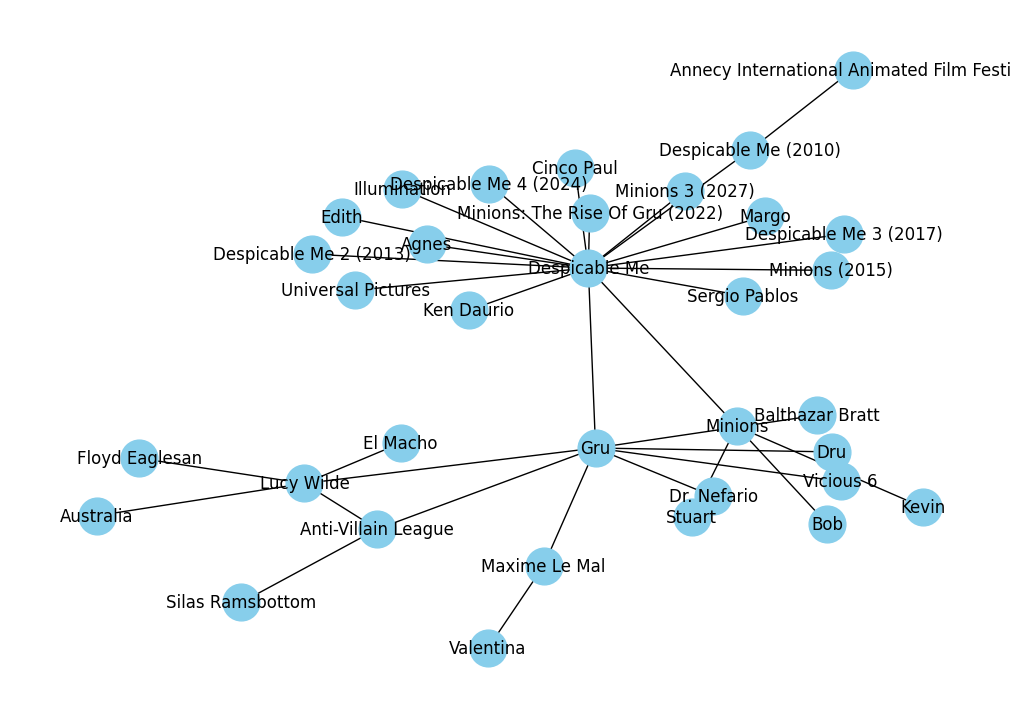

In [26]:

# Use Networkx and Matplotlib to visualize the graph

# Initialize a new graph
G = nx.Graph()
pos = nx.spring_layout(G, k=0.15, iterations=20) # k controls the distance between nodes, iterations for layout accuracy

# Dynamically add nodes from graph_documents_nodes
for node in graph_documents_nodes:
    G.add_node(node.id, type=node.type)

# Dynamically add edges from graph_documents_relationships
for relationship in graph_documents_relationships:
    G.add_edge(relationship.source.id, relationship.target.id, type=relationship.type)

# Draw the graph
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='k')
plt.show()

In [27]:
# Use PyVis to visualize the graph

from pyvis.network import Network

# Initialize a new PyVis network graph
net = Network(notebook=True)

# Dynamically add nodes from graph_documents_nodes
for node in graph_documents_nodes:
    net.add_node(node.id, label=node.id, title=node.type)

# Dynamically add edges from graph_documents_relationships
for relationship in graph_documents_relationships:
    net.add_edge(relationship.source.id, relationship.target.id, title=relationship.type)

# Set options for better visualization
net.set_options("""
var options = {
  "nodes": {
    "font": {
      "size": 22
    }
  },
  "edges": {
    "color": {
      "inherit": true
    },
    "smooth": false
  },
  "physics": {
    "forceAtlas2Based": {
      "gravitationalConstant": -100,
      "centralGravity": 0.01,
      "springLength": 100,
      "springConstant": 0.08
    },
    "maxVelocity": 50,
    "minVelocity": 0.1,
    "solver": "forceAtlas2Based",
    "timestep": 0.35,
    "stabilization": {
      "enabled": true,
      "iterations": 1000
    }
  }
}
""")

# Show the graph
net.show("graph.html")
# from IPython.display import HTML
# HTML(filename="graph.html")

graph.html


In [15]:
# Import the necessary libraries.
from langchain_openai import AzureOpenAIEmbeddings
from langchain.chains.question_answering import load_qa_chain
from langchain.llms import AzureOpenAI
from langchain.vectorstores import Chroma

In [49]:
# Define the variables to connect to the Azure OpenAI Service API.
OPENAI_API_KEY = "PLEASE_ENTER_YOUR_OWNED_AZURE_OPENAI_KEY"
OPENAI_API_BASE = "https://PLEASE_ENTER_YOUR_OWNED_AZURE_OPENAI_RESOURCE_NAME.openai.azure.com/"
OPENAI_EMBEDDING_DEPLOYMENT_NAME = "PLEASE_ENTER_YOUR_OWNED_AZURE_OPENAI_EMBEDDING_MODEL_DEPLOYMENT_NAME"
OPENAI_EMBEDDING_MODEL_NAME = "PLEASE_ENTER_YOUR_DEPLOYED_AZURE_OPENAI_EMBEDDING_MODEL_NAME"
OPENAI_DEPLOYMENT_NAME = "PLEASE_ENTER_YOUR_OWNED_AZURE_OPENAI_LLM_MODEL_DEPLOYMENT_NAME"
OPENAI_MODEL_NAME = "PLEASE_ENTER_YOUR_DEPLOYED_AZURE_OPENAI_LLM_MODEL_NAME"
OPENAI_API_VERSION = "2023-05-15"
OPENAI_API_TYPE = "azure"

In [17]:
# Define the function to interact with Azure OpenAI Embedding Model.
embeddings = AzureOpenAIEmbeddings(deployment=OPENAI_EMBEDDING_DEPLOYMENT_NAME, 
                                openai_api_key=OPENAI_API_KEY, 
                                model=OPENAI_EMBEDDING_MODEL_NAME,
                                azure_endpoint=OPENAI_API_BASE,
                                openai_api_type=OPENAI_API_TYPE, 
                                chunk_size=1000)

In [18]:
# Define the Chroma vector store and function to generate embeddings.
db = Chroma(persist_directory="./chroma_db/", embedding_function=embeddings)

In [51]:
# Create a Question Answering chain using the embeddings and the similarity search.
chain = load_qa_chain(AzureOpenAI(openai_api_key=OPENAI_API_KEY, 
                                  deployment_name=OPENAI_DEPLOYMENT_NAME,
                                  model_name=OPENAI_MODEL_NAME,
                                  azure_endpoint=OPENAI_API_BASE,
                                  openai_api_version=OPENAI_API_VERSION),
                                  chain_type="stuff")

In [58]:
# Define the query to search and display the most relevant document content.
inquiry = question
docs = db.similarity_search(inquiry)
rag_result = chain.run(input_documents=docs, question=inquiry)
print(rag_result)

 Gru is a grouchy, quick-witted, and cynical former supervillain, who serves as a secret agent in order to fight other supervillains. He is the son of Marlena and the Bald Terror (real name Robert), twin brother of Dru, the adoptive father of Margo, Edith, and Agnes as well as the biological father of Gru Jr., husband of Lucy, and boss of the Minions. In the first film, Gru is an ambitious supervillain who constantly seeks approval from his mother, until the adoption of his daughters convinces him that their happiness is the most important thing. In the second film, Gru leaves his villainous past behind to care for his adoptive daughters, but then soon joins forces - unwillingly - with secret agent Lucy Wilde, whom he later marries. In the third film, after he and Lucy are fired from their jobs at the Anti-Villain League, Gru learns that he has a twin brother, Dru, whom he never met due to their divorced parents raising each child separately. Along with Lucy and the girls, Gru meets Dr

In [57]:
# Define the query to search and display the most relevant document content with the graph.
withGraph = "\ncombine the relationship information below to obtain all the necessary information to get the result\n"
inquiry = question + withGraph + graph_result
docs = db.similarity_search(inquiry)
graph_rag_result = chain.run(input_documents=docs, question=inquiry)
print(graph_rag_result)

 Gru is the son of Marlena and the Bald Terror (real name Robert), twin brother of Dru, the adoptive father of Margo, Edith, and Agnes as well as the biological father of Gru Jr., husband of Lucy, and boss of the Minions. At the beginning of the first film, Gru is an ambitious supervillain who constantly seeks approval from his mother, until the adoption of his daughters convinces him that their happiness is the most important thing. In the second film, Gru leaves his villainous past behind to care for his adoptive daughters, but then soon joins forces - unwillingly - with secret agent Lucy Wilde, whom he later marries. In the third film, after he and Lucy are fired from their jobs at the Anti-Villain League, Gru learns that he has a twin brother, Dru, whom he never met due to their divorced parents raising each child separately. Along with Lucy and the girls, Gru meets Dru at his mansion in Freedonia, and they form a brotherly relationship over the course of the film. In the fourth fi